**Project** :- Analyzing the trends of COVID-19 with Python.

Problem Statement :- Given data about COVID 19 patients, we are trying to visualize the impact and analyze the trend of rate of infection and recovery as well as make predictions about the number of cases expected a week in future based on the current trends.

Time series :- Forecasting Covid-19 cases data.
Models :- AR,MA,ARIMA,SARIMAX and so on.

We are going to use one model, i.e fbprophet model **bold text**

Importing Essential Libraries:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Loading the dataset:

In [5]:
df = pd.read_csv("covid_19_data-set .csv")

In [6]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


Some Preprocessing of the data:

In [7]:
# Converting the 'Date' column to datetime format for time-series handling

df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Replace missing values in 'Province/State' with empty string to avoid null issues

df['Province/State'] = df['Province/State'].fillna('')

In [9]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [10]:
df.shape

(49068, 10)

In [11]:
#Sorting the dataset by date so that trends can be analyzed chronologically

df = df.sort_values(by='Date')


In [12]:
df.head(90)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
166,Sint Maarten,Netherlands,18.042500,-63.054800,2020-01-22,0,0,0,0,Europe
167,,Netherlands,52.132600,5.291300,2020-01-22,0,0,0,0,Europe
168,,New Zealand,-40.900600,174.886000,2020-01-22,0,0,0,0,Western Pacific
169,,Nicaragua,12.865416,-85.207229,2020-01-22,0,0,0,0,Americas
...,...,...,...,...,...,...,...,...,...,...
251,,Malawi,-13.254300,34.301500,2020-01-22,0,0,0,0,Africa
252,Falkland Islands (Malvinas),United Kingdom,-51.796300,-59.523600,2020-01-22,0,0,0,0,Europe
253,Saint Pierre and Miquelon,France,46.885200,-56.315900,2020-01-22,0,0,0,0,Europe
254,,South Sudan,6.877000,31.307000,2020-01-22,0,0,0,0,Africa


In [13]:
# checking the last date in the data-set when any observation has been recorded:
df.tail(60)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48910,,Fiji,-17.713400,178.065000,2020-07-27,27,0,18,9,Western Pacific
48911,,Finland,61.924110,25.748151,2020-07-27,7398,329,6920,149,Europe
48912,French Guiana,France,3.933900,-53.125800,2020-07-27,7514,42,6047,1425,Europe
48913,French Polynesia,France,-17.679700,149.406800,2020-07-27,62,0,60,2,Europe
48914,Guadeloupe,France,16.265000,-61.551000,2020-07-27,203,14,176,13,Europe
48915,Mayotte,France,-12.827500,45.166244,2020-07-27,2900,38,2672,190,Europe
48916,New Caledonia,France,-20.904305,165.618042,2020-07-27,22,0,22,0,Europe
48917,Reunion,France,-21.115100,55.536400,2020-07-27,657,4,592,61,Europe
48918,Saint Barthelemy,France,17.900000,-62.833300,2020-07-27,7,0,6,1,Europe
48919,St Martin,France,18.070800,-63.050100,2020-07-27,49,3,41,5,Europe


In [14]:
 # last date of record
 df['Date'].max()

Timestamp('2020-07-27 00:00:00')

In [15]:
# filtration of the rows based on the last date:
top=df[df['Date']=='2020-07-27']

In [16]:
top

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48983,,Panama,8.538000,-80.782100,2020-07-27,61442,1322,35086,25034,Americas
48982,,Pakistan,30.375300,69.345100,2020-07-27,274289,5842,241026,27421,Eastern Mediterranean
48981,,Oman,21.512583,55.923255,2020-07-27,77058,393,57028,19637,Eastern Mediterranean
48980,,Norway,60.472000,8.468900,2020-07-27,9132,255,8752,125,Europe
48972,Curacao,Netherlands,12.169600,-68.990000,2020-07-27,29,1,24,4,Europe
...,...,...,...,...,...,...,...,...,...,...
48899,,Denmark,56.263900,9.501800,2020-07-27,13547,613,12417,517,Europe
48900,,Djibouti,11.825100,42.590300,2020-07-27,5059,58,4977,24,Eastern Mediterranean
48901,,Dominican Republic,18.735700,-70.162700,2020-07-27,64156,1083,30204,32869,Americas
48903,,Egypt,26.820553,30.802498,2020-07-27,92482,4652,34838,52992,Eastern Mediterranean


Aggregate data globally by date to prepare for trend analysis and time-series modeling.


In [17]:
global_df = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
global_df['New_Confirmed'] = global_df['Confirmed'].diff().fillna(0)
global_df['New_Deaths'] = global_df['Deaths'].diff().fillna(0)
global_df['New_Recovered'] = global_df['Recovered'].diff().fillna(0)

This line plot tracks global COVID-19 trends over time—highlighting confirmed cases, deaths, and recoveries, along with key surges, peaks, and recovery patterns.

**Insights:**

The graph shows how COVID-19 spread globally over time. Confirmed cases rose sharply, showing how quickly the virus spread across countries. Recoveries also increased steadily, though they stayed below the total number of confirmed cases. Deaths grew at a much slower rate, indicating that while many people were infected, a smaller proportion of cases were fatal. Overall, the steady upward trend across all lines suggests the pandemic was still actively spreading during this period.
**bold text**



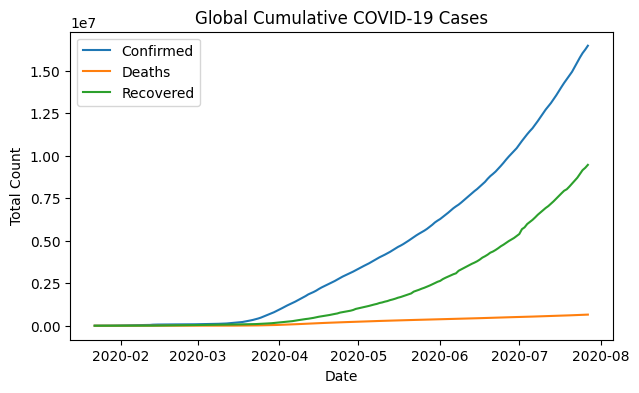

In [18]:
plt.figure(figsize=(7, 4))
plt.plot(global_df['Date'], global_df['Confirmed'], label='Confirmed')
plt.plot(global_df['Date'], global_df['Deaths'], label='Deaths')
plt.plot(global_df['Date'], global_df['Recovered'], label='Recovered')
plt.legend()
plt.title("Global Cumulative COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Total Count")
plt.show()

**The chart illustrates the daily number of newly confirmed cases and overlays a 7-day rolling average to smooth out daily fluctuations. This is especially helpful to visualize longer-term trends in infection rates without the noise caused by weekend or reporting delays.**


**Why is it needed?**

Daily numbers can be noisy due to reporting delays. A rolling average smooths this and reveals real trends.

**Insights:**

The plot reveals that daily new cases started low but began rising sharply around March 2020, showing the rapid global spread. The 7-day average line (in red) highlights a steady upward trend, confirming that infections were consistently increasing rather than just spiking randomly. This indicates sustained community transmission and growing outbreak intensity over time.

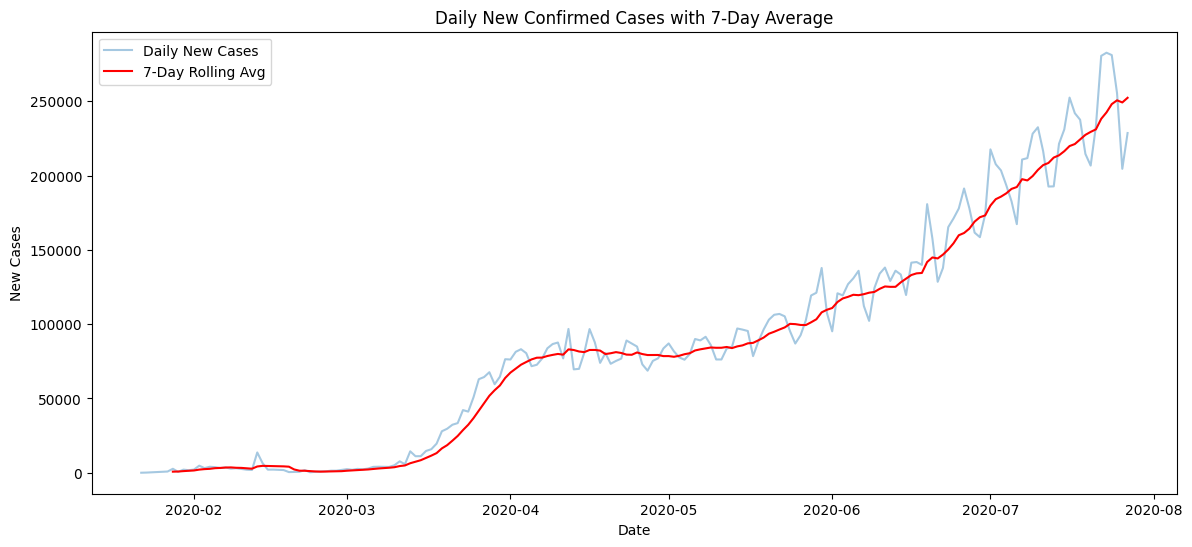

In [19]:
#Daily New Cases with 7-Day Rolling Average

global_df['Confirmed_7day_avg'] = global_df['New_Confirmed'].rolling(window=7).mean()
plt.figure(figsize=(14, 6))
plt.plot(global_df['Date'], global_df['New_Confirmed'], label='Daily New Cases', alpha=0.4)
plt.plot(global_df['Date'], global_df['Confirmed_7day_avg'], label='7-Day Rolling Avg', color='red')
plt.title("Daily New Confirmed Cases with 7-Day Average")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.show()

**This histogram provides insight into the frequency distribution of new daily cases. It helps us assess if the data is normally distributed or skewed, and reveals any outliers or frequent ranges of daily infection numbers.**

**Why?**

This histogram shows the distribution of daily new confirmed COVID-19 cases. It helps visualize how often different ranges of daily cases occurred — revealing whether the spread was steady or dominated by a few large spikes.

**Insights**

 Most days recorded only a small number of new COVID-19 cases, which explains the tall bar near zero. However, the long stretch of bars toward higher numbers shows that there were some days with huge spikes in infections. This uneven pattern — lots of quiet days followed by sudden surges — suggests that the virus didn’t spread at a constant rate but instead flared up in waves, likely due to outbreaks in different regions or changes in testing and reporting.

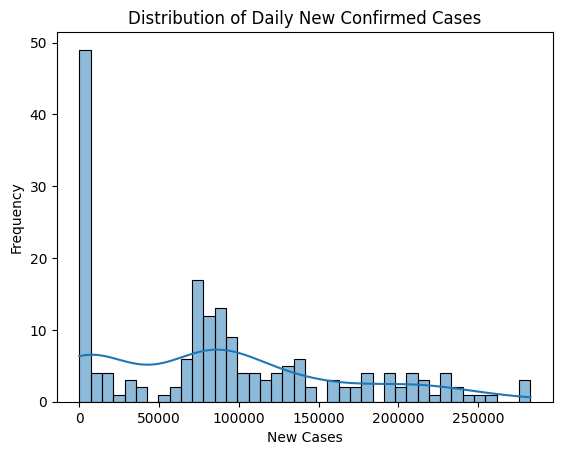

In [20]:
sns.histplot(global_df['New_Confirmed'], bins=40, kde=True)
plt.title("Distribution of Daily New Confirmed Cases")
plt.xlabel("New Cases")
plt.ylabel("Frequency")
plt.show()

**This heatmap shows how COVID-19 numbers are connected—like how confirmed cases and deaths often rise together, which can help build better prediction models. We are exploring the relationships between confirmed, deaths, and recovered cases to discover interdependencies.**

**Why?**

We need this to see how different COVID-19 metrics move together, helping us understand relationships between variables and detect which factors influence each other the most.

**Insights**
*   Strong positive correlations between confirmed, deaths, and recovered cases mean they tend to increase together — as total infections rise, so do deaths and recoveries.

*   Moderate correlations with daily new cases indicate more short-term fluctuations and day-to-day variations.

*  This suggests that while overall totals are closely linked, short-term daily changes can behave differently due to reporting delays or sudden outbreaks.








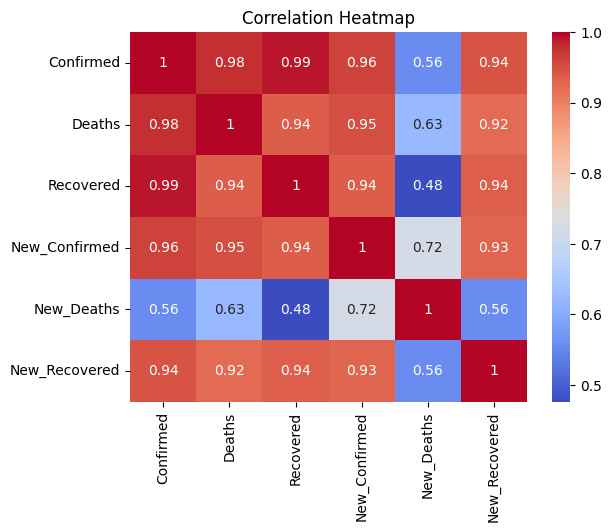

In [21]:
# Correlation Between Case Types
sns.heatmap(global_df[['Confirmed', 'Deaths', 'Recovered', 'New_Confirmed', 'New_Deaths', 'New_Recovered']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**This plot tracks the number of active cases (i.e., total confirmed minus deaths and recoveries).
 It gives us a view of how many people were currently infected over time.**

** Why?**

It is useful for understanding the pressure on healthcare systems during various phases.

**Insights**

The plot shows that the number of active COVID-19 cases rose steadily from early 2020, with a sharp climb starting around March. This means infections were increasing faster than recoveries or deaths, leading to a growing number of people still battling the virus. The continuous rise suggests that the pandemic was intensifying globally, putting mounting pressure on hospitals and healthcare systems over time.

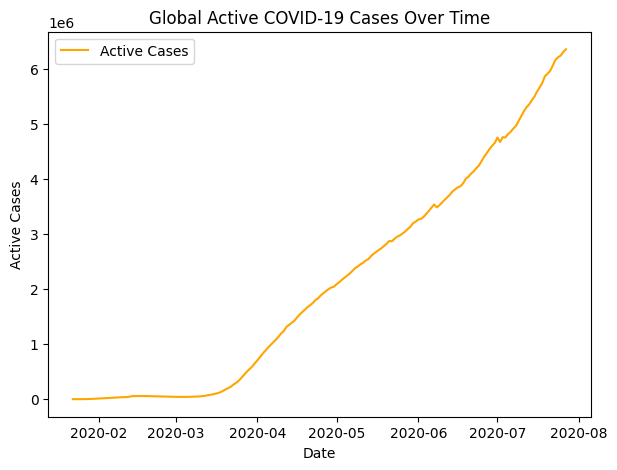

In [22]:
global_df['Active'] = global_df['Confirmed'] - global_df['Deaths'] - global_df['Recovered']
plt.figure(figsize=(7,5))
plt.plot(global_df['Date'], global_df['Active'], label='Active Cases', color='orange')
plt.title("Global Active COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.legend()
plt.show()

**These bar charts compare the countries most affected by the pandemic in terms of confirmed cases, deaths, and recoveries. This helps highlight the global hotspots and provides comparative insight into country-level responses and outcomes.**

**Why?**
To identify the most affected countries using bar charts for confirmed, deaths, and recoveries.


In [23]:
latest = df[df['Date'] == df['Date'].max()]
country_agg = latest.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum().sort_values(by='Confirmed', ascending=False).head(10)

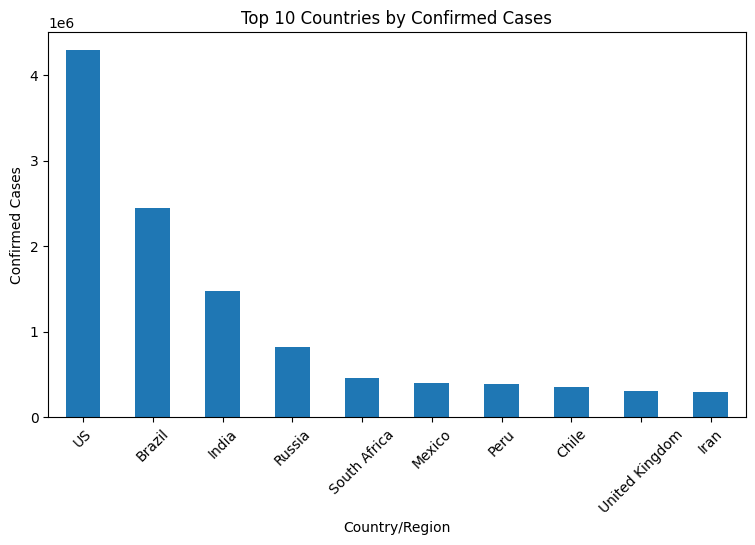

In [24]:
### Top 10 Countries by Confirmed Cases

country_agg['Confirmed'].plot(kind='bar', figsize=(9, 5), title='Top 10 Countries by Confirmed Cases')
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.show()


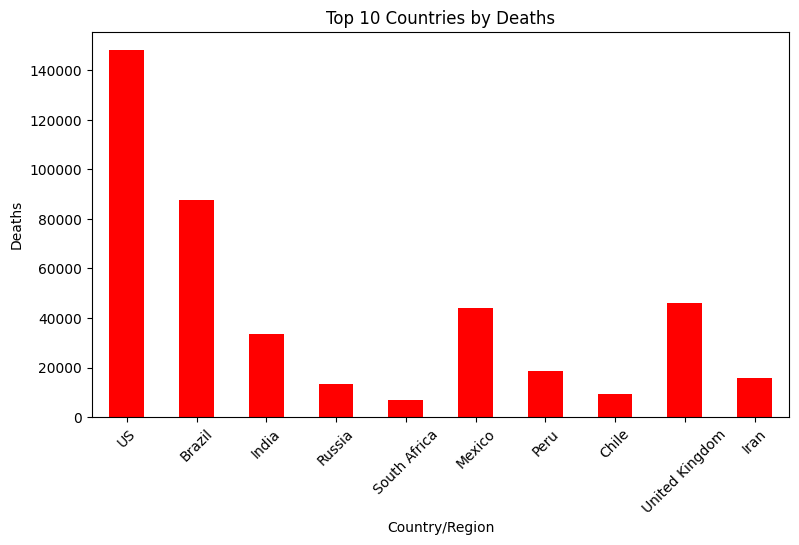

In [25]:
### Top 10 Countries by Deaths

country_agg['Deaths'].plot(kind='bar', figsize=(9, 5), color='red', title='Top 10 Countries by Deaths')
plt.ylabel("Deaths")
plt.xticks(rotation=45)
plt.show()

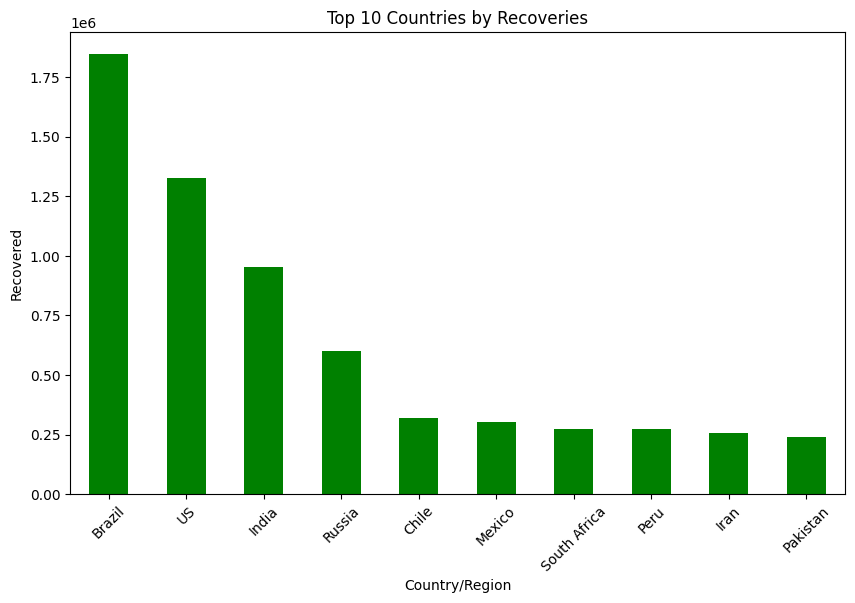

In [26]:
### Top 10 Countries by Recoveries

# Full country aggregation, not just top 10 by confirmed
recovery_data = latest.groupby('Country/Region')[['Recovered']].sum()

# Filter top 10 countries with non-zero recoveries
recovery_top = recovery_data[recovery_data['Recovered'] > 0].sort_values(by='Recovered', ascending=False).head(10)

# Plot the bar chart
recovery_top['Recovered'].plot(kind='bar', figsize=(10, 6), color='green', title='Top 10 Countries by Recoveries')
plt.ylabel("Recovered")
plt.xticks(rotation=45)
plt.show()

**This line chart displays the cumulative confirmed case trends for selected high-impact countries. It helps visually compare how each country's outbreak evolved over time and whether they experienced single or multiple waves.**

**Why:**

 Track how the pandemic evolved in the top affected countries across time.

**Insights**

The chart shows that the United States experienced the fastest and largest rise in confirmed COVID-19 cases, far surpassing other countries. Brazil and India also saw sharp upward trends, indicating severe and rapidly spreading outbreaks. Russia showed moderate growth, while France’s curve flattened early, suggesting better containment during this period. Overall, it highlights how the pandemic impacted countries differently, with some facing prolonged surges while others managed to slow the spread sooner.



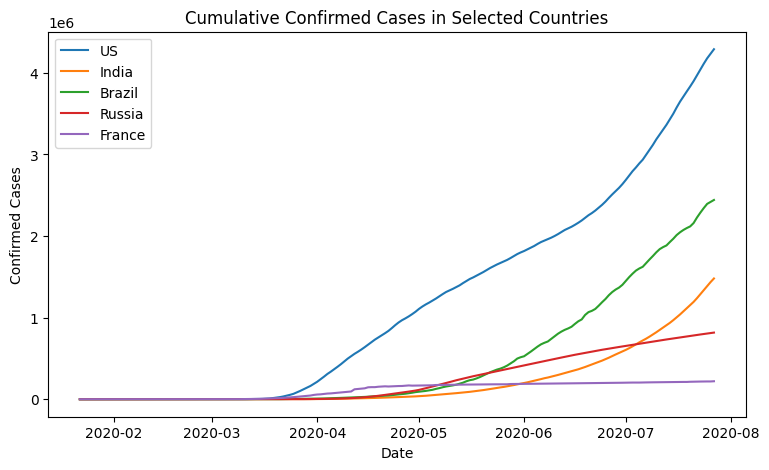

In [27]:
##  Country-Wise Case Progression Over Time

countries = ['US', 'India', 'Brazil', 'Russia', 'France']
plt.figure(figsize=(9, 5))
for country in countries:
    country_df = df[df['Country/Region'] == country]
    country_ts = country_df.groupby('Date')[['Confirmed']].sum().reset_index()
    plt.plot(country_ts['Date'], country_ts['Confirmed'], label=country)
plt.title("Cumulative Confirmed Cases in Selected Countries")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

**This bar chart presents how total confirmed cases accumulated month-by-month.
It helps identify which months saw surges and allows us to detect possible seasonality or major outbreak periods.**

**Why:**

 To understand the month-to-month spread to identify surges or slowdowns in global spread.

**Insights:**

The chart shows that global COVID-19 cases grew slowly in the early months of 2020 but began rising sharply from April onward. May through July saw massive surges, with July recording the highest number of confirmed cases. This steady month-to-month increase indicates how rapidly the virus spread worldwide during mid-2020, suggesting that containment measures were not yet effectively slowing transmission at that time.



/tmp/ipython-input-202678226.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly, x='Month', y='Confirmed', palette='viridis')


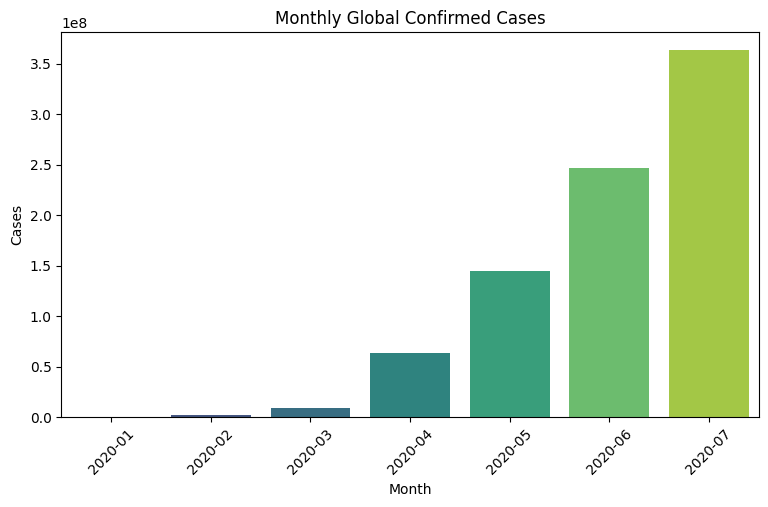

In [28]:
## Monthly Global Growth
df['Month'] = df['Date'].dt.to_period('M')
monthly = df.groupby('Month')[['Confirmed']].sum().reset_index()
monthly['Month'] = monthly['Month'].astype(str)

plt.figure(figsize=(9,5))
sns.barplot(data=monthly, x='Month', y='Confirmed', palette='viridis')
plt.xticks(rotation=45)
plt.title("Monthly Global Confirmed Cases")
plt.ylabel("Cases")
plt.xlabel("Month")
plt.show()


**The 'Deaths' data is crucial not just for measuring total impact, but for understanding the fatality rate of the virus. By analyzing deaths relative to confirmed cases, we can compute the Case Fatality Ratio (CFR), which offers a deeper perspective on how deadly the outbreak was in different countries. This helps identify regions with vulnerable populations or strained healthcare systems.**

**Why:** Identify the most affected countries using bar charts for confirmed, deaths, and recoveries. Analyze which regions had the highest mortality impact.


In [29]:
# Calculate CFR as (Deaths / Confirmed) * 100 for the latest date
latest['CFR'] = (latest['Deaths'] / latest['Confirmed']) * 100
cfr_top = latest.groupby('Country/Region')['CFR'].mean().sort_values(ascending=False).dropna().head(10)


/tmp/ipython-input-1714792861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest['CFR'] = (latest['Deaths'] / latest['Confirmed']) * 100


**This bar chart shows the top 10 countries with the highest average case fatality ratio (CFR), calculated as the percentage of deaths out of confirmed cases. High CFR values may suggest overwhelmed healthcare systems, vulnerable populations, or delays in detection and treatment. It offers a deeper look at the severity of the outbreak beyond just case counts.**


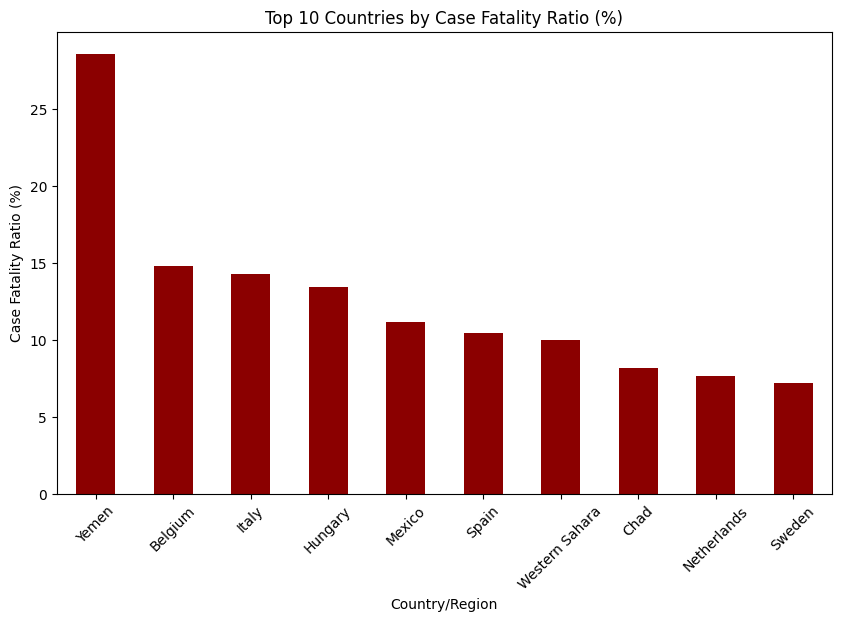

In [30]:
# Plot CFR
cfr_top.plot(kind='bar', figsize=(10, 6), color='darkred', title='Top 10 Countries by Case Fatality Ratio (%)')
plt.ylabel("Case Fatality Ratio (%)")
plt.xticks(rotation=45)
plt.show()

**Summary:**

 - Confirmed cases grew exponentially with major peaks visible in global daily new case charts.
- The 7-day rolling average smoothed out irregular reporting patterns.
- US, India, and Brazil were consistently among the highest impacted countries.
- Correlations showed strong relationships between confirmed, deaths, and recoveries.
- Active case trends and monthly growth provide more insight into pandemic dynamics.


Time-series modelling using facebook-prophet library on this covid dataset:

In [31]:
pip install prophet

In [32]:
# Install a compatible version of cmdstanpy
!pip install cmdstanpy==1.0.4
from prophet import Prophet # importing the model from this prophet library for modelling

In [33]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,Month
0,,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,2020-01
166,Sint Maarten,Netherlands,18.042500,-63.054800,2020-01-22,0,0,0,0,Europe,2020-01
167,,Netherlands,52.132600,5.291300,2020-01-22,0,0,0,0,Europe,2020-01
168,,New Zealand,-40.900600,174.886000,2020-01-22,0,0,0,0,Western Pacific,2020-01
169,,Nicaragua,12.865416,-85.207229,2020-01-22,0,0,0,0,Americas,2020-01
...,...,...,...,...,...,...,...,...,...,...,...
48899,,Denmark,56.263900,9.501800,2020-07-27,13547,613,12417,517,Europe,2020-07
48900,,Djibouti,11.825100,42.590300,2020-07-27,5059,58,4977,24,Eastern Mediterranean,2020-07
48901,,Dominican Republic,18.735700,-70.162700,2020-07-27,64156,1083,30204,32869,Americas,2020-07
48903,,Egypt,26.820553,30.802498,2020-07-27,92482,4652,34838,52992,Eastern Mediterranean,2020-07


In [34]:
df['Active'].sum()

np.int64(396715350)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49068 entries, 0 to 49067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  49068 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
 10  Month           49068 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(4), object(3), period[M](1)
memory usage: 4.5+ MB


##Making the data-set time series modelling friendly, because Prophet is basically a time-series model :





In [36]:
confirmed= df.groupby('Date')['Confirmed'].sum()

In [37]:
confirmed

,Confirmed
Date,
2020-01-22,555
2020-01-23,654
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
...,...
2020-07-23,15510481
2020-07-24,15791645
2020-07-25,16047190


In [38]:
confirmed=pd.DataFrame(confirmed).reset_index()

In [39]:
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [40]:
deaths= df.groupby('Date')['Deaths'].sum()

In [41]:
deaths = pd.DataFrame(deaths).reset_index()

In [42]:
deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [43]:
recovered = df.groupby('Date')['Recovered'].sum()

In [44]:
recovered=pd.DataFrame(recovered).reset_index()

In [45]:
recovered.head()

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


##For buildign a forecasting model using fbprophet library, there should be only 2 columns passed.
##The column names should always be ---> 'ds','y' .
##Confirmed cases prediction for next 1 week :

In [46]:
confirmed.columns=['ds','y'] # changing the column names of confirmed data-set to fit it into the prophet model.

In [47]:
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [48]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [49]:
m= Prophet()

In [50]:
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9cpii6fq/3ewev4hk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9cpii6fq/zj9d8g5g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20821', 'data', 'file=/tmp/tmp9cpii6fq/3ewev4hk.json', 'init=/tmp/tmp9cpii6fq/zj9d8g5g.json', 'output', 'file=/tmp/tmp9cpii6fq/prophet_model340lgwzu/prophet_model-20251031163553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:35:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:35:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
future=m.make_future_dataframe(periods=7)

In [52]:
future.tail(7)

,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [53]:
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [54]:
forecast=m.predict(future)

In [55]:
forecast.tail(7)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
188,2020-07-28,1.633705e+07,1.621899e+07,1.642830e+07,1.633705e+07,1.633705e+07,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,0.0,0.0,0.0,1.632020e+07
189,2020-07-29,1.654104e+07,1.642560e+07,1.664029e+07,1.654090e+07,1.654292e+07,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,1.652997e+07
190,2020-07-30,1.674503e+07,1.663257e+07,1.684619e+07,1.674070e+07,1.675090e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.684377e+07,1.706193e+07,1.693860e+07,1.696224e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.705002e+07,1.727330e+07,1.713464e+07,1.717403e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.724837e+07,1.747611e+07,1.732900e+07,1.738831e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07
194,2020-08-03,1.756099e+07,1.744297e+07,1.767960e+07,1.752265e+07,1.760104e+07,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,0.0,0.0,0.0,1.755889e+07


##Plotting the covid-19 time-series and it's forecast:

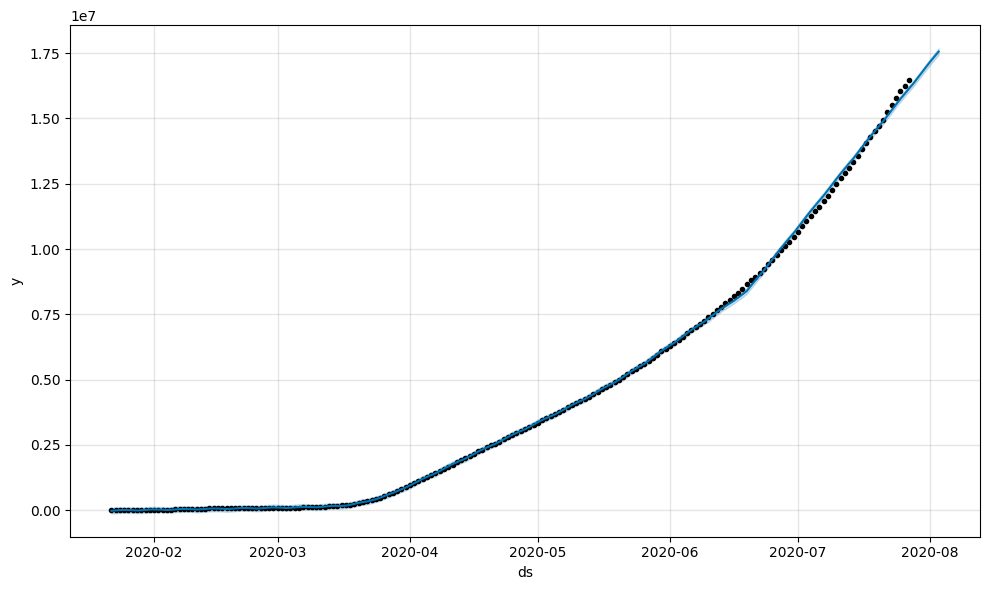

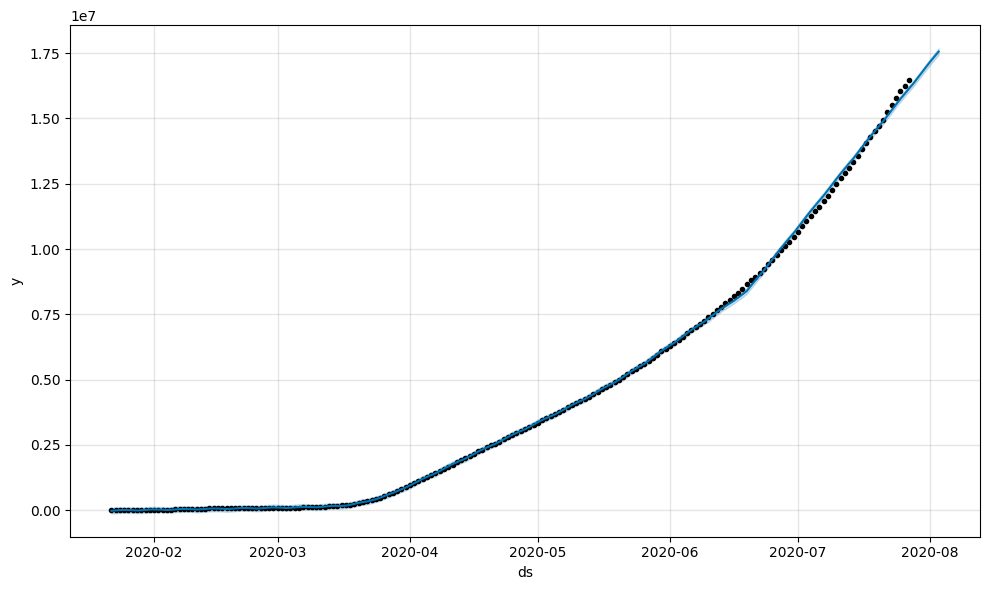

In [ ]:
m.plot(forecast) # The extended blue graph is the forecast of the next 7 periods by the prophet model(T.S).

##Plotting the components of a time-series data using prophet :

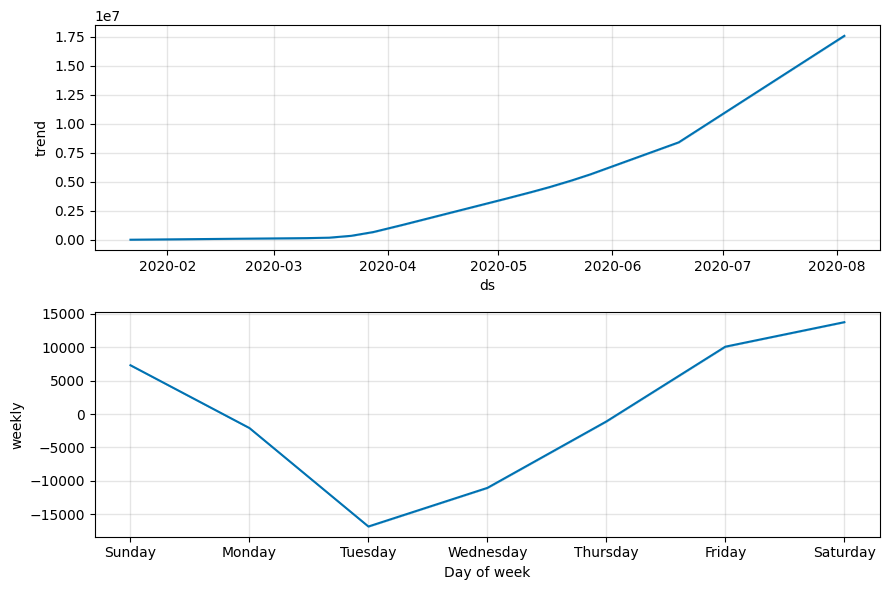

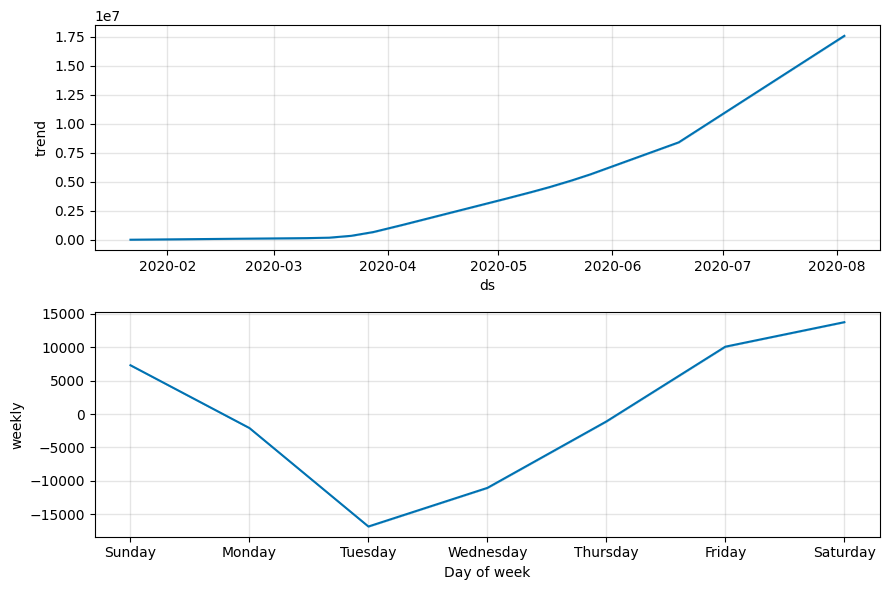

In [ ]:
m.plot_components(forecast)